# Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importación del dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

## Información de los datos

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Limpieza Inicial

### Eliminar Duplicados

In [6]:
df = df.drop_duplicates()
df.shape

(768, 9)

### Eliminar información Irrelevante

In [ ]:
# Inicialmente no es necesario eliminar ifnormación irrelevante, muy pocas columnas.

## Análisis de variables univariantes

### Variables Categóricas

<function matplotlib.pyplot.show(close=None, block=None)>

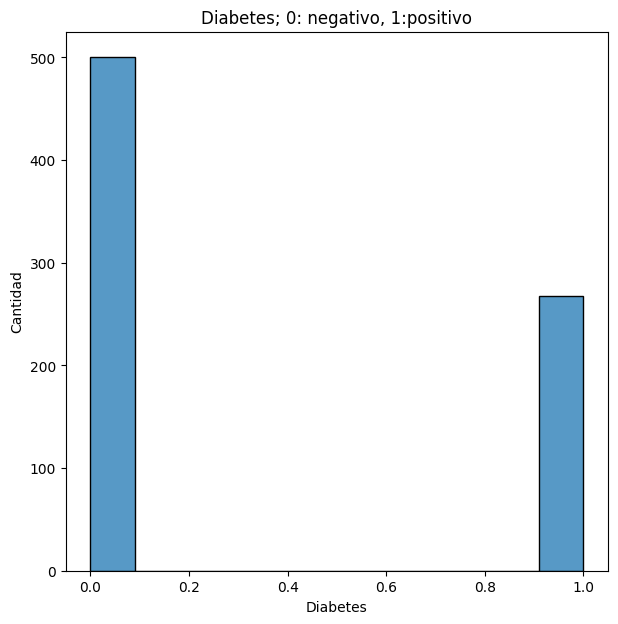

In [12]:
#Solo 1 variable y es la objetivo
plt.figure(figsize = (7, 7))
sns.histplot(df.Outcome)
plt.title("Diabetes; 0: negativo, 1:positivo")
plt.xlabel("Diabetes")
plt.ylabel("Cantidad")
plt.show


In [ ]:
# Del set de datos los no diabeticos dobla practicamente a los que si = 70%-30%

### Variables Numéricas

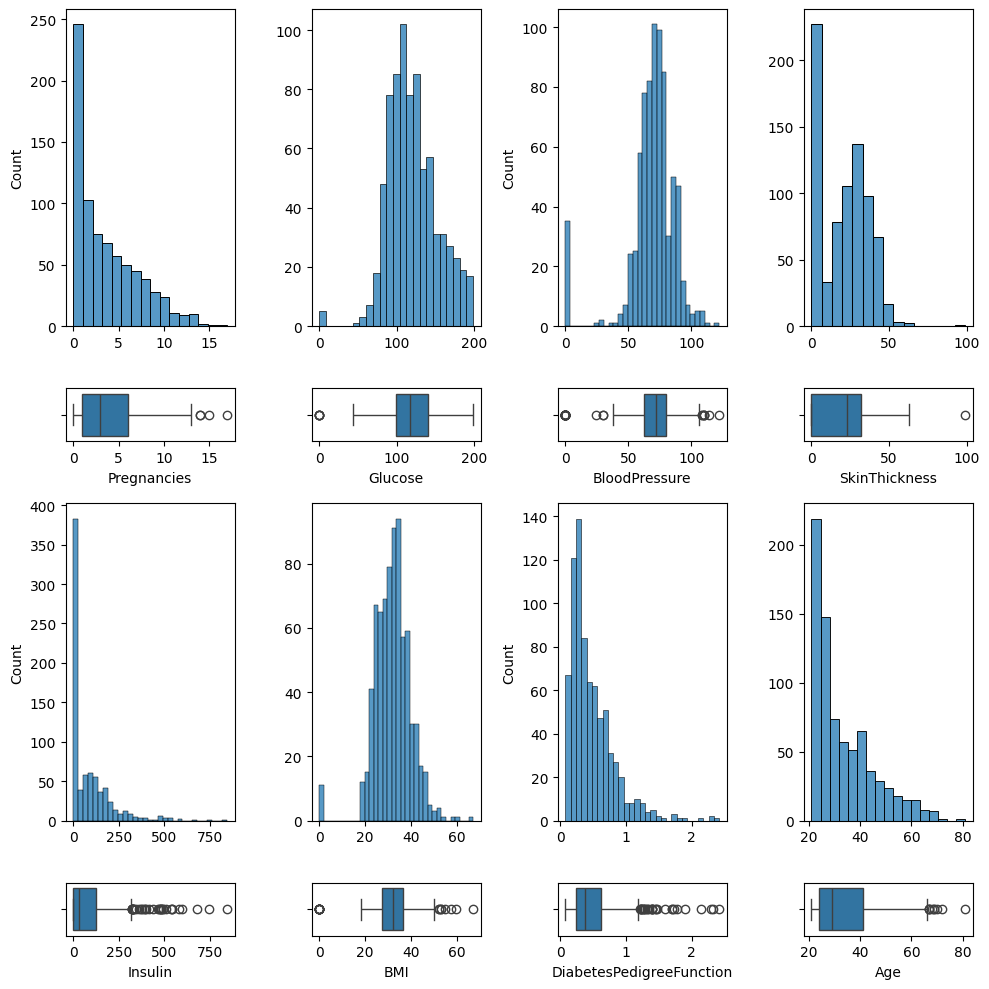

In [32]:
fig, axis = plt.subplots(4, 4, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure")
sns.histplot(ax = axis[0, 3], data = df, x = "SkinThickness").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "SkinThickness")

sns.histplot(ax = axis[2, 0], data = df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[2, 1], data = df, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "BMI")
sns.histplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2, 3], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [33]:
# Hay varios Outliers, sin embargo, como son resultados de laboratorios, por momento no es correcto eliminarlos

## Guardar Dataframe

In [34]:
df.to_csv('df.csv',index=False)

## Análisis de variables multivariante

In [36]:
# traemos primeramente el dataframe para trabajar
DT =  pd.read_csv('/workspaces/decision-tree/src/df.csv')
DT.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
